<h4 style="font-size:60px;color:#6166B3;text-align:center"><strong></strong> <strong style="color:black">Probleme2</strong></h4>

<h1 style="font-size:40px;color:#6166B3"><strong>A propos du </strong><strong style="color:black">CIFAR-10 Dataset:</strong></h1>

<p style="font-size:120%">L'ensemble de données CIFAR-10 se compose de 60 000 images couleur 32x32 réparties en 10 classes, avec 6 000 images par classe. Il y a 50 000 images d'entraînement et 10 000 images de test.</p>

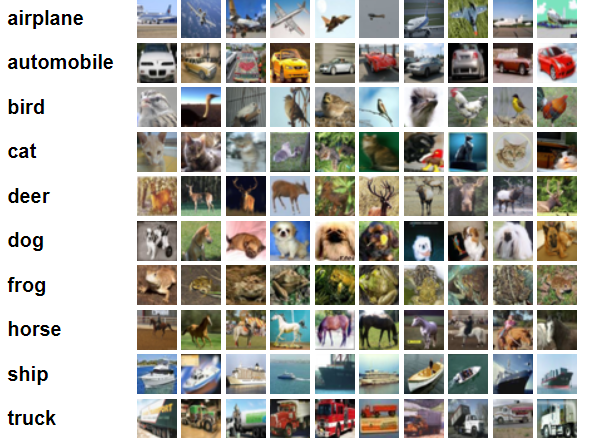

<p style="font-size:120%">Le CIFAR-10 et le CIFAR-100 sont des sous-ensembles étiquetés de l'ensemble de données de 80 millions de minuscules images. Ils ont été recueillis par Alex Krizhevsky, Vinod Nair et Geoffrey Hinton.</p>

<p style="font-size:120%"><mark>L'ensemble de données est divisé en cinq lots d'entraînement et un lot de test, chacun contenant 10 000 images.</mark> Le lot de test contient exactement 1 000 images sélectionnées au hasard dans chaque classe. Les lots d'apprentissage contiennent les images restantes dans un ordre aléatoire, mais certains lots d'apprentissage peuvent contenir plus d'images d'une classe que d'une autre. Entre eux, les lots de formation contiennent exactement 5000 images de chaque classe.</p>

<img src="https://miro.medium.com/max/1400/0*Ra55_QqeYjDWH0ZR.gif" style="width:80%"></img>

<p style="font-size:120%">Nous allons effectuer une tâche de classification en utilisant CNN.</p>

## 1.expliquer le type de problème d’apprentissage automatique correspondant
L'apprentissage se fait en utilisant une technique d'apprentissage supervisé. Cela signifie que le modèle est entraîné en utilisant une série d'exemples d'images et de leurs étiquettes de classe correspondantes. Le modèle est ainsi capable de "apprendre" à quelle classe appartient chaque type d'image en analysant les caractéristiques de l'image et en les comparant aux exemples d'entraînement. Une fois entraîné, le modèle peut être utilisé pour prédire la classe d'une image qu'il n'a jamais vue auparavant en utilisant les mêmes caractéristiques qu'il a apprises pendant l'entraînement.

Il existe de nombreuses techniques différentes pour l'entraînement de modèles de reconnaissance d'objets sur des données comme CIFAR-10. Certaines approches couramment utilisées incluent l'apprentissage par réseau de neurones convolutionnels (CNN) et l'apprentissage par arbre de décision.


## 2.Formulation mathématique du CNN

Le CNN (Réseau de Neurones Convolutifs) est un type de modèle de réseau de neurones qui est particulièrement efficace pour la reconnaissance d'images. La formulation mathématique d'un CNN peut être complexe et dépend de nombreux éléments, tels que la structure du réseau, les fonctions de convolution et de pooling utilisées, et les différentes couches du réseau.

Voici quelques éléments de base qui peuvent vous aider à comprendre la formulation mathématique d'un CNN :

Les couches d'un CNN sont généralement organisées en plusieurs couches de convolution, suivies de couches de pooling et de couches fully-connected. Chaque couche de convolution est composée de filtres de convolution, qui sont appliqués à l'entrée (généralement une image) pour en extraire des caractéristiques.

La convolution est une opération mathématique qui consiste à appliquer un filtre à une entrée en utilisant un produit de convolution. Le filtre est un tableau de valeurs (généralement appelé "poids") qui sont appliquées de manière glissante à l'entrée, en utilisant une formule mathématique spécifique.

Voici un exemple de formulation mathématique d'une couche de convolution d'un CNN :

$$y = f(w * x + b)$$

Où :

$y$ est la sortie de la couche de convolution
$f$ est la fonction d'activation (par exemple ReLU)
$w$ est le filtre de convolution (ou "poids")
$x$ est l'entrée de la couche de convolution
$b$ est le biais de la couche de convolution


<h1 style="font-size:40px;color:#6166B3"><strong>Importation des bibliothèques </strong><strong style="color:black">:</strong></h1>

In [16]:
from __future__ import print_function
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l2
import numpy as np
import os
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('fivethirtyeight')
%matplotlib inline

# Defining the parameters
batch_size = 32
num_classes = 10
epochs = 50

<h1 style="font-size:40px;color:#6166B3"><strong>Importation du dataset </strong><strong style="color:black">CIFAR-10 :</strong></h1>

In [17]:
# Diviser les données entre d'entrainement (train) et de test (test)
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


<h1 style="font-size:40px;color:#6166B3"><strong>Visualisation du data </strong><strong style="color:black">CIFAR-10 :</strong></h1>

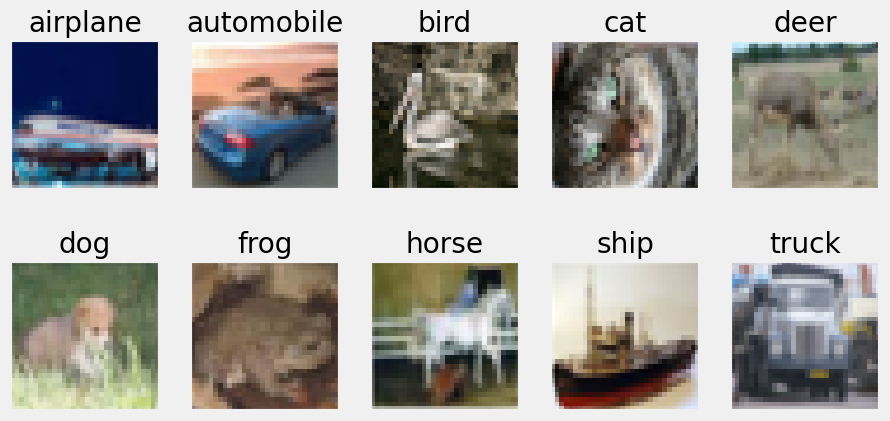

In [18]:
# tracer de quelques images aléatoires

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

fig = plt.figure(figsize=(10,5))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = (features_idx[img_num,::])
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

<h1 style="font-size:50px;color:#6166B3"><strong>Pre-Processing </strong><strong style="color:black">du Dataset:</strong></h1>

In [19]:
# Converssion des vecteurs de classe en matrices de classe binaires.
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

<h1 style="font-size:30px;color:#6166B3"><strong>Approche via Deep Learning </strong><strong style="color:black">Conception du réseau de neurones:</strong></h1>

In [20]:
#Construire le modèle CNN

model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

<h1 style="font-size:30px;color:#6166B3"><strong>Visualisation </strong><strong style="color:black">du réseau de neurones:</strong></h1>

In [21]:
#Visualiser notre modèle
# import visualkeras
# visualkeras.layered_view(model, scale_xy=10, legend=True)

<h1 style="font-size:30px;color:#6166B3"><strong></strong><strong style="color:black">Résumé du réseau de neurones:</strong></h1>

In [22]:
# résumé du modèle
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 activation_6 (Activation)   (None, 32, 32, 64)        0         
                                                                 
 batch_normalization_4 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 30, 30, 64)        36928     
                                                                 
 activation_7 (Activation)   (None, 30, 30, 64)        0         
                                                                 
 batch_normalization_5 (Batc  (None, 30, 30, 64)       256       
 hNormalization)                                      

<h1 style="font-size:40px;color:#6166B3"><strong>Entraînement </strong><strong style="color:black">du Model:</strong></h1>

In [23]:
# compiler 
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalisation de l'image d'entrée
x_train /= 255
x_test /= 255

epochs=50

# Entrainement du model
history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/50
1563/1563 [==============================] - 354s 223ms/step - loss: 8.5185 - accuracy: 0.4258 - val_loss: 6.2317 - val_accuracy: 0.5485
Epoch 2/50
1563/1563 [==============================] - 266s 170ms/step - loss: 4.9496 - accuracy: 0.5709 - val_loss: 3.7769 - val_accuracy: 0.6332
Epoch 3/50
1563/1563 [==============================] - 269s 172ms/step - loss: 3.0667 - accuracy: 0.6490 - val_loss: 2.4174 - val_accuracy: 0.6902
Epoch 4/50
1563/1563 [==============================] - 269s 172ms/step - loss: 2.0627 - accuracy: 0.6948 - val_loss: 1.7596 - val_accuracy: 0.7039
Epoch 5/50
1563/1563 [==============================] - 271s 173ms/step - loss: 1.5169 - accuracy: 0.7262 - val_loss: 1.3494 - val_accuracy: 0.7310
Epoch 6/50
1563/1563 [==============================] - 256s 164ms/step - loss: 1.2164 - accuracy: 0.7478 - val_loss: 1.1513 - val_accuracy: 0.7438
Epoch 7/50
1563/1563 [==============================] - 262s 167ms/step - loss: 1.0573 - accuracy: 0.7600 - val_

KeyboardInterrupt: 

<h1 style="font-size:40px;color:#6166B3"><strong>Evaluation </strong><strong style="color:black">du Model:</strong></h1>

In [ ]:
#  Tracer la précision du modèle et la perte de modèle par rapport aux époques Epochs (Hidden Input)
plt.figure(figsize=[20,8])

# résumer l'historique pour plus de précision
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy', size=25, pad=20)
plt.ylabel('Accuracy', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')
# résumer l'historique des pertes

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', size=25, pad=20)
plt.ylabel('Loss', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<h1 style="font-size:30px;color:#6166B3"><strong>Prediction </strong><strong style="color:black">utilisation du modèle CNN:</strong></h1>

In [ ]:
# Vérification des prédictions !
predictions = model.predict(x_test)

plt.figure(figsize=[10,10])

class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.subplot(2,2,1)
n = 3
plt.imshow(x_test[n].reshape(32, 32, -1), cmap=plt.cm.binary)
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[n], axis=0)]), size=20)
plt.grid(False)

plt.subplot(2,2,2)
n = 4
plt.imshow(x_test[n].reshape(32, 32, -1), cmap=plt.cm.binary)
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[n], axis=0)]), size=20)
plt.grid(False)

plt.subplot(2,2,3)
n = 8
plt.imshow(x_test[n].reshape(32, 32, -1), cmap=plt.cm.binary)
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[n], axis=0)]), size=20)
plt.grid(False)

plt.subplot(2,2,4)
n = 6
plt.imshow(x_test[n].reshape(32, 32, -1), cmap=plt.cm.binary)
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[n], axis=0)]), size=20)
plt.grid(False)

plt.suptitle("Predictions of CIFAR-10 Data", size=30, color="#6166B3")

plt.show()